#### 실습 : www.naver.com, www.daum.net, www.yahoo.com 에서 li태그 목록 정보 불러와 출력해보세요
[추가] => new 중 하나를 선택해서 주요기사 내용을 출력하세요

In [48]:
import urllib.request           # 원격지 서버 파일 요청
from bs4 import BeautifulSoup   # Html파싱

url = 'http://www.naver.com'    # 접속할 주소
url_n = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101'
url1 = 'https://news.daum.net/'

res = urllib.request.urlopen(url1)   # 응답 객체
res.geturl()                         # 접속 url주소를 반환
data =res.read()                     # 객체 데이터를 읽어 data변수 저장

type(data)
# utd-8 디코딩
src = data.decode('utf-8')
# html 파싱
html = BeautifulSoup(src,'html.parser')
li_tags = html.select('.tit_g > a')

# a_tags = html.find_all('a')
# for a in li_tags:
#     if a.string:
#         print("a tag내용: ",a.string)

# 크롤링 데이터
crawling_data = []
i=0
for li in li_tags:
    if li.string:
        # print(f"li tag내용[{i}]: ",li.string.strip())
        crawling_data.append(li.string.strip())
    i+=1
# print("crawling_result")
# print(crawling_data)
# print(type(crawling_data))

# crawling_data.txt로 저장하세요(data/crawling.txt로 저장)
# text save = object -> file(string) -> load(string)
# file = open('data/crawling_data.txt','a',encoding='utf-8')
# for wr in crawling_data:
#     file.write(wr+"\n")     # 저장할 문자열
# file.close()

## pickle로 저장하기
import pickle

# save
with open('data/data.pickle1','wb') as file:
    pickle.dump(crawling_data,file)
print("pickle save")

# load
with open('data/data.pickle1','rb') as file:
    crawling_data = pickle.load(file)
print(f"pickle load\n{crawling_data}")

pickle save
pickle load
['동해시, 개청 42주년 기념행사 미개최..3년째 못 해', "'휴대폰 쇼핑'이 대세..2월 온라인 매출 76%가 '모바일'", '중대본 "요양시설 확진자 신속 치료..요양기동반 운영 추진"', "홍콩증시, '사업보고서 미제출' 30여개사 거래 중단", '유엔 안보리, 소말리아 새 평화유지군 만장일치 승인', '러 경기침체, 우크라 침공 후 급격하게 진행.."오래 지속될 것"', "정부, '품귀현상' 해열제·감기약 공급 확대 지속키로", '카페 일회용품 퇴출 첫날 곳곳 실랑이.."개인이 선택해야"', "파키스탄 총리, 불신임 유력에도 사임 거부..'미국 음모론' 제기", '러 철군약속 못믿는 바이든 "푸틴, 스스로 고립시키고 있다"', '박터지는 대구..여기에 朴心까지[막오르는 6·1 지방선거]⑤', "사고 터지면 경영자 高강도 수사.. 현장은 '작업 중지' 속출", '미국 휘발유 가격 급등에 도요타·테슬라·현대차 점유율↑ 전망', '청두 한중혁신창업단지, 새로운 협력 청사진 제시', '쌍용차 매각대금 납입 못한 날 금융위 "정상추진" 인수위 보고', '시도교육감협 "인수위 산하 전문가 참여 교육정책 기구 제안"', '"국민께 반성한다" 신전대협, 만우절 맞아 국정백서 \'풍자 사이트\' 열어', '롯데카드, 매각 추진..인수 후보 우리·하나·KT 등 거론', "파괴된 러시아 장갑차 앞에서 '두 손 번쩍' 든 우크라 군인 [뉴시스Pic]", '어린이 해열제 391%·기침가래약 210% 생산↑.."당분간 공급 확대 유지"', '[무등의 아침] 윤영덕 "민주당 중진, 험지 도전해야..윤석열 당선인 국정수행 기대치 낮아"', '[영상] 13시간씩 전기 없이 버티는 스리랑카..반정부 시위 격화 [나우,어스]', "[핵잼 사이언스] 두 눈 크기도 짝짝..심해사는 희귀 '딸기 오징어' 포착", "[데일리 북한]'4월 경축' 본격화.. 김정은, 선전 간부들과 기념촬영", '[지구촌 돋보기] 지구는 미러 갈등..국제우주정거장 상황

#### pickle
- import pickle을 통해서 모듈 임포트가 필요함
- pickle 모듈을 이용하면 원하는 데이터를 자료형의 변경없이 파일로
그대로 저장하여 그대로 로드하여 사용이 가능함
- pickle로 데이터를 저장하거나 불러올 때는 파일을 바이트 형식으로 읽거나 써야한다.
- wb로 데이터를 입력하는 경우, 확장자는 .bin을 사용하는게 좋다
- 모든 파이썬 객체를 저장하고 읽을 수 있다

(저장)  
pickle.dump(data, file) -> data 저장한 소스 데이터 버퍼, file은 저장할 위치


In [33]:
# 예)  저장
import pickle
list = [1,2,3,4,5]
with open('list.bin','wb') as f:
    pickle.dump(list,f)
# (원래) file = open('list.bin','wb')
# list = [1,2,3,4,5]
# pickle.dump(list,file)
# file.close


In [35]:
# 예) 로드(읽기) var = pickle.load(file)
import pickle
with open('list.bin','rb') as f:
    data = pickle.load(f)
print(data)

[1, 2, 3, 4, 5]


#### 단어 빈도수  
특정 문서의 자료를 토대로 단어들의 출현 빈도수를 이용하여 해당 문서의 특징 또는 경향을 분석하는 방법을 토픽분석이라고 한다.

In [2]:
import pickle

# pickle data file load
file = open("data/data.pickle",mode='rb')
news_data2 = pickle.load(file)

# 텍스트 전처리
import re
def clean_text(text_str):
    # 문장부호 제거
    text_str_re = re.sub(
        '[,.?!:\'\"]',
        '',
        text_str
        )  # sub(패턴, 변경단어, 변경할 자료)
    # 특수문자, 숫자 제거
    text_str_re = re.sub(
        '[!@#$%^&*()]|[0-9]',
        '',
        text_str_re)
    # 영문 소문자 -> 영문제거
    text_str_re = text_str_re.lower()
    text_str_re = re.sub('[a-z]','',text_str_re)
    # 공백 제거
    text_str_re = ' '.join(text_str_re.split())
    
    return text_str_re

## 텍스트 전처리 함수 호출
clean_texts = [clean_text(row) for row in news_data2]
# print(">> text전처리 결과 <<")
# print(clean_texts)

## word count
word_count = {}

for text in clean_texts:        # 텍스트 -> 문장
    for word in text.split():    # 문장 -> 단어
        word_count[word] = word_count.get(word,0) + 1
# print(">> 워드 카운트 <<")
# print(word_count)

## 단어 전처리
# 불용 단어 제거
del word_count['[바로잡습니다]']

# 3회 이상 출력 단어 & 2~4자 단어 지정
new_word_count = {}
for word,cnt in word_count.items():
    if cnt >= 3 and len(word) >=2 and len(word) < 4:
        print(word,'--->',word_count[word])
        new_word_count[word] = new_word_count.get(word,cnt)
print(">> 단어 전처리 끝 결과 <<")
print(new_word_count)

## top word counter
from collections import Counter     # 모듈을 추가

counter = Counter(new_word_count)
top5_word = counter.most_common(5)  # Top 5
print(">> top 5 <<")
print(top5_word)

정경심 ---> 4
조국 ---> 10
장관 ---> 3
서울대 ---> 4
복직 ---> 3
지하철 ---> 4
막판 ---> 3
설리 ---> 3
축구 ---> 3
>> 단어 전처리 끝 결과 <<
{'정경심': 4, '조국': 10, '장관': 3, '서울대': 4, '복직': 3, '지하철': 4, '막판': 3, '설리': 3, '축구': 3}
>> top 5 <<
[('조국', 10), ('정경심', 4), ('서울대', 4), ('지하철', 4), ('장관', 3)]


In [ ]:
'''
import pickle

# load
with open('data/data.pickle1','rb') as file:
    crawling_data = pickle.load(file)

import re
clean_texts_1 = [clean_text(row) for row in crawling_data]
# print(clean_texts_1)

# word count
word_count = {}
for text in clean_texts_1:
    for word in text.split():
        word_count[word] = word_count.get(word,0) + 1
# print(word_count)

# 단어 전처리
# 불용 단어제거
del word_count['파괴된']

# 2회 이상 출력 단어 & 2~4자 단어지정
new_word_count = {}
for word,cnt in word_count.items():
    if cnt >=2 and len(word) >= 2 and len(word) < 4:
        print(word,'--->',word_count[word])
        new_word_count[word] = new_word_count.get(word,cnt)
print(new_word_count)

# top word counter
from collections import Counter

counter = Counter(new_word_count)
top5_word = counter.most_common(5)
print(">> top 5 <<")
print(top5_word)
'''

#### 자료시각화 (metplotlib 패키지 설치)  
pip install matplotlib

['조국', '정경심', '서울대', '지하철', '장관']
[10, 4, 4, 4, 3]
선 그래프


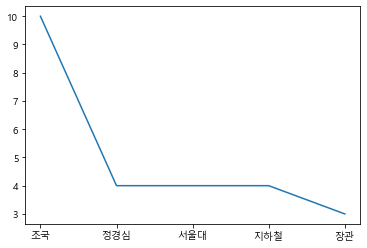

막대 그래프


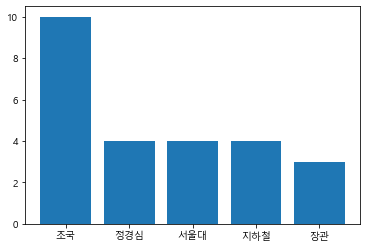

원형 그래프


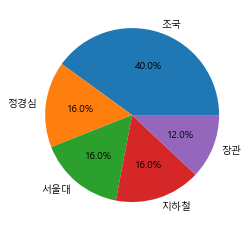

In [8]:
# 1. 단어와 출현 빈도수 만들기
words = []       # 단어
counts = []     # 출현 빈도수

for word,count in top5_word:
    words.append(word) 
    counts.append(count)
print(words)
print(counts)

## pyplot 모듈을 import => plt로 별칭 사용
import matplotlib.pyplot as plt

## 차트에서 한글 지원
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(
    fname="C:\Windows\Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

## 선 그래프
print('선 그래프')
plt.plot(words,counts)
plt.show()

## 막대그래프
print('막대 그래프')
plt.bar(words,counts)
plt.show()

## 원형그래프: pie()
print('원형 그래프')
plt.pie(counts,labels=words,autopct='%.1f%%')
plt.show()

#### DataBase 사용  
  
SQLite3
- 기기 내부에서만 사용할 수 있는 DBMS이다
- 주로 모바일이나 소형 기기에서 관계형 데이터베이스를 생성해주슨 소프트웨어
- 생성된 DB에는 외부에서 접근을 허용하지않음
- 파이썬은 SQLite3를 기본으로 제공하고 있어 제약없이 import하여 사용할 수 있음


In [3]:
## 테이블 생성
#  Create table [if not exists] table-name(
#    column-name data-type-name column-constraint,
#    ....
#   )

# data-type
#   TEXT : 문자형       ex)TEXT(size)
#   NUMERIC : 숫자형    ex)NUMERIC
#   Integer : 정수형
#   REAL : 실수형
#   BLOB : 대용량 자료

# 제약조건
#   PRIMARY KEY : 기본키
#   UNIQUE : 중복불가
#   NOT NULL : 생략불가
#   CHECK : 제한조건
#   DEFAULT : 기본값

# CRUD -> Create(Insert), Read(Select), Update(Update), Delete(Delete)

## SQLite3 사용예시
## 모듈 import
import sqlite3
# 확인
# print(sqlite3.sqlite_version_info)    # 버전정보 : (3, 37, 2)

try:
    # DB 연동
    conn = sqlite3.connect('data/sqlite_db')    # DB생성 -> 연결
    # sql 실행객체
    cursor = conn.cursor()
    # table 생성
    sql = 'create table if not exists test_table (name text(10),phone text(15), addr text(50))'
    # 실행
    cursor.execute(sql)
    ## 레코드 추가
    # cursor.execute("insert into test_table values ('홍길동','010-1111-1111','산골짜기')")
    # cursor.execute("insert into test_table values ('이순신','010-9999-9999','해남시')")
    # cursor.execute("insert into test_table values ('강감찬','010-2222-2222','평양시')")
    # cursor.execute("insert into test_table values ('이성계','010-3333-3333','개성시')")
    # cursor.execute("insert into word_count values ('1', '산불','2번')") 
    # conn.commit()   # DB반영
    
    ## 레코드 조회
    cursor.execute("select * from test_table")
    rows = cursor.fetchall()    # 조회 레코드 읽기
    # # 출력1
    # for row in rows:
    #     print(row)
    # # 출력2
    # print("이름 \t 전화번호         주소")
    # for row in rows:
    #     print(row[0],'\t',row[1],'\t',row[2])
    # 메뉴를 사용하여 다음 코드를 작성하세요.
    # (1. db출력, 2. db수정, 3. db삭제, 0. 종료)
    ## name으로 입력값을 받아서 정보를 수정하는 코드 작성하세요
    ## name을 입력받아서 레코드를 삭제하는 코드를 작성하세요    
    while True:
        
        menu = input('메뉴를 선택하세요 : \n1. db출력\n2. db수정\n3. db삭제\n0. 종료 : ')
        if menu == '0':
            print('프로그램을 종료합니다.')
            break
        elif menu == '1':
            cursor.execute("select * from test_table")
            rows = cursor.fetchall()
            for row in rows:
                print(row[0],'\t',row[1],'\t',row[2])
        elif menu == '2':
            name = input('이름을 입력하세요 : ')
            s = cursor.execute(f"select * from test_table where name = '{name}'")
            print(s,'중 수정할 내용을 입력하세요')
            phone = input('전화번호 : ')
            addr = input('주소 : ')
            cursor.execute(f"update test_table set phone='{phone}',addr='{addr}' where name='{name}'")
            conn.commit()
        elif menu == '3':
            s=cursor.execute("select * from test_table")
            print(s)
            name = input('삭제할 이름을 입력하세요 : ')
            cursor.execute("delete from test_table where='{name}'")
            conn.commit()
        else : 
            print('메뉴를 잘못 선택하였습니다.')    

except Exception as e:
    print("DB연동 에러 : ",e)
    conn.rollback()
finally:
    cursor.close()
    conn.close()

홍길동 	 010-1234-1234 t 인천
이순신 	 010-9999-9999 t 해남시
강감찬 	 010-2222-2222 t 평양시
이성계 	 010-3333-3333 t 개성시
프로그램을 종료합니다.
